# Clustering

In [9]:
import pandas as pd
import numpy as np

In [11]:
# Baixando nossa base de dados direto do repositório da disciplina (https://github.com/ahirtonlopes/Unsupervised_Learning) para o Google Colab

!curl -O https://raw.githubusercontent.com/ahirtonlopes/Unsupervised_Learning/main/IMDB_movie_dataset.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0


In [12]:
dataset = pd.read_csv('IMDB_movie_dataset.csv',encoding='utf-8')
dataset.head()

,color,director_name,duration,gross,genres,movie_title,title_year,language,country,budget,imdb_score,actors,movie_facebook_likes
0,Color,Martin Scorsese,240,116866727.0,Biography|Comedy|Crime|Drama,The Wolf of Wall Street,2013,English,USA,100000000.0,8.2,"Leonardo DiCaprio,Matthew McConaughey,Jon Favreau",138000
1,Color,Shane Black,195,408992272.0,Action|Adventure|Sci-Fi,Iron Man 3,2013,English,USA,200000000.0,7.2,"Robert Downey Jr.,Jon Favreau,Don Cheadle",95000
2,color,Quentin Tarantino,187,54116191.0,Crime|Drama|Mystery|Thriller|Western,The Hateful Eight,2015,English,USA,44000000.0,7.9,"Craig Stark,Jennifer Jason Leigh,Zoë Bell",114000
3,Color,Kenneth Lonergan,186,46495.0,Drama,Margaret,2011,English,usa,14000000.0,6.5,"Matt Damon,Kieran Culkin,John Gallagher Jr.",0
4,Color,Peter Jackson,186,258355354.0,Adventure|Fantasy,The Hobbit: The Desolation of Smaug,2013,English,USA,225000000.0,7.9,"Aidan Turner,Adam Brown,James Nesbitt",83000


In [13]:
# Dropando colunas desnecessárias para nosso tipo de análise como cores e linguagem (que podem ser importantes em outros contextos)

dataset.drop(['color','language'], axis= 1, inplace= True)


In [14]:
# Agora, preenchemos os valores vazios de duas colunas numéricas: renda bruta (gross) e orçamento (budget) com 0's.

dataset['gross'].fillna(0, inplace=True)
dataset['budget'].fillna(0, inplace=True)

C:\Users\marci\AppData\Local\Temp\ipykernel_23712\454445906.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset['gross'].fillna(0, inplace=True)
C:\Users\marci\AppData\Local\Temp\ipykernel_23712\454445906.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when

In [15]:
# Em seguida, unificamos os valores de outras colunas, como país, nome do diretor ou título do filme.

# Colocando em maiúsculas todos os valores de países

dataset['country'] = dataset['country'].str.upper()
dataset['country'] = np.where(dataset['country']=='UNITED STATES','USA', dataset['country'])
dataset.head()

,director_name,duration,gross,genres,movie_title,title_year,country,budget,imdb_score,actors,movie_facebook_likes
0,Martin Scorsese,240,116866727.0,Biography|Comedy|Crime|Drama,The Wolf of Wall Street,2013,USA,100000000.0,8.2,"Leonardo DiCaprio,Matthew McConaughey,Jon Favreau",138000
1,Shane Black,195,408992272.0,Action|Adventure|Sci-Fi,Iron Man 3,2013,USA,200000000.0,7.2,"Robert Downey Jr.,Jon Favreau,Don Cheadle",95000
2,Quentin Tarantino,187,54116191.0,Crime|Drama|Mystery|Thriller|Western,The Hateful Eight,2015,USA,44000000.0,7.9,"Craig Stark,Jennifer Jason Leigh,Zoë Bell",114000
3,Kenneth Lonergan,186,46495.0,Drama,Margaret,2011,USA,14000000.0,6.5,"Matt Damon,Kieran Culkin,John Gallagher Jr.",0
4,Peter Jackson,186,258355354.0,Adventure|Fantasy,The Hobbit: The Desolation of Smaug,2013,USA,225000000.0,7.9,"Aidan Turner,Adam Brown,James Nesbitt",83000


In [16]:
# Checando por entradas truncadas de dados

dataset['director_name'] = np.where(dataset['director_name']=='N/A','', dataset['director_name'])
dataset['director_name'] = np.where(dataset['director_name']=='NaN','', dataset['director_name'])
dataset['director_name'] = np.where(dataset['director_name']=='Null','', dataset['director_name'])

dataset['movie_title'] = dataset['movie_title'].str.replace('Â', '')

In [17]:
# De modo a normalizar os dados, dividimos os atores em três atributos diferentes e eliminamos a coluna real da seguinte forma:

actor_list = dataset['actors'].str.split(',',n=2 , expand = True)

dataset["actor1"]= actor_list[0]
dataset["actor2"]= actor_list[1]
dataset["actor3"]= actor_list[2]
dataset.drop(columns=['actors'], inplace=True)
dataset.head()
     

,director_name,duration,gross,genres,movie_title,title_year,country,budget,imdb_score,movie_facebook_likes,actor1,actor2,actor3
0,Martin Scorsese,240,116866727.0,Biography|Comedy|Crime|Drama,The Wolf of Wall Street,2013,USA,100000000.0,8.2,138000,Leonardo DiCaprio,Matthew McConaughey,Jon Favreau
1,Shane Black,195,408992272.0,Action|Adventure|Sci-Fi,Iron Man 3,2013,USA,200000000.0,7.2,95000,Robert Downey Jr.,Jon Favreau,Don Cheadle
2,Quentin Tarantino,187,54116191.0,Crime|Drama|Mystery|Thriller|Western,The Hateful Eight,2015,USA,44000000.0,7.9,114000,Craig Stark,Jennifer Jason Leigh,Zoë Bell
3,Kenneth Lonergan,186,46495.0,Drama,Margaret,2011,USA,14000000.0,6.5,0,Matt Damon,Kieran Culkin,John Gallagher Jr.
4,Peter Jackson,186,258355354.0,Adventure|Fantasy,The Hobbit: The Desolation of Smaug,2013,USA,225000000.0,7.9,83000,Aidan Turner,Adam Brown,James Nesbitt


In [18]:
dataset['duration'] = np.where(dataset['duration']<=10,0, dataset['duration'])
dataset['duration'] = np.where(dataset['duration']>300,0, dataset['duration'])
dataset['imdb_score'] = np.where(dataset['imdb_score']<=0,0, dataset['imdb_score'])
dataset['title_year'] = np.where(dataset['title_year']<2010,0, dataset['title_year'])

In [19]:
# E, finalmente, definimos uma nova métrica chamada GOB que mostra o orçamento bruto acima do orçamento para cada filme:

# Adicione uma nova métrica GOB (Bruto acima do orçamento, Gross Over Budget)

dataset['GOB'] = dataset.apply(lambda row: row['gross']/row['budget'] if row['budget']!=0 else 0, axis=1)
top_GOB=dataset.sort_values('GOB',ascending=False).head(15)

In [20]:
# Como temos os nomes completos dos diretores, adiciono outra coluna para encurtar seus nomes para melhor visualizá-los em um gráfico.
# Pegamos a segunda parte do nome, que pode ser o sobrenome deles.

top_GOB['director_familyName'] = dataset["director_name"].str.split(" ", n = 2, expand = True) [1]

In [21]:
# Nova etapa: Visualização -  a próxima etapa é então visualizá-los em um gráfico de barras simples, como segue:

import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\marci\AppData\Local\Temp\ipykernel_23712\3710292407.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


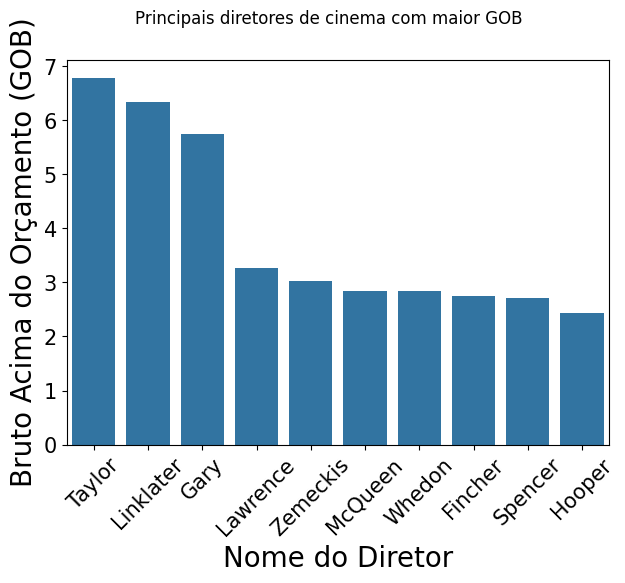

In [22]:
fig,ax = plt.subplots(figsize=(7, 5))

# Desenhando um gráfico de barras
ax = sns.barplot(x='director_familyName', y='GOB', data=top_GOB)

# Girando o nome dos diretores em 45 graus
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

# Título do nosso gráfico
fig.suptitle('Principais diretores de cinema com maior GOB', fontsize=12)

# Definindo o nome e o tamanho da fonte do rótulo dos eixos x e y
ax.set_xlabel('Nome do Diretor',fontsize=20)
ax.set_ylabel('Bruto Acima do Orçamento (GOB)',fontsize=20)

# Definindo o tamanho do tick do eixo
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)

# Mostra o gráfico
plt.show();

C:\Users\marci\AppData\Local\Temp\ipykernel_23712\1958959002.py:11: FutureWarning: The provided callable <function mean at 0x000002793A00ADE0> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  dataset_pivot=top_GOB.pivot_table(index=['title_year'], values=['GOB'], aggfunc=np.mean ,margins=True)


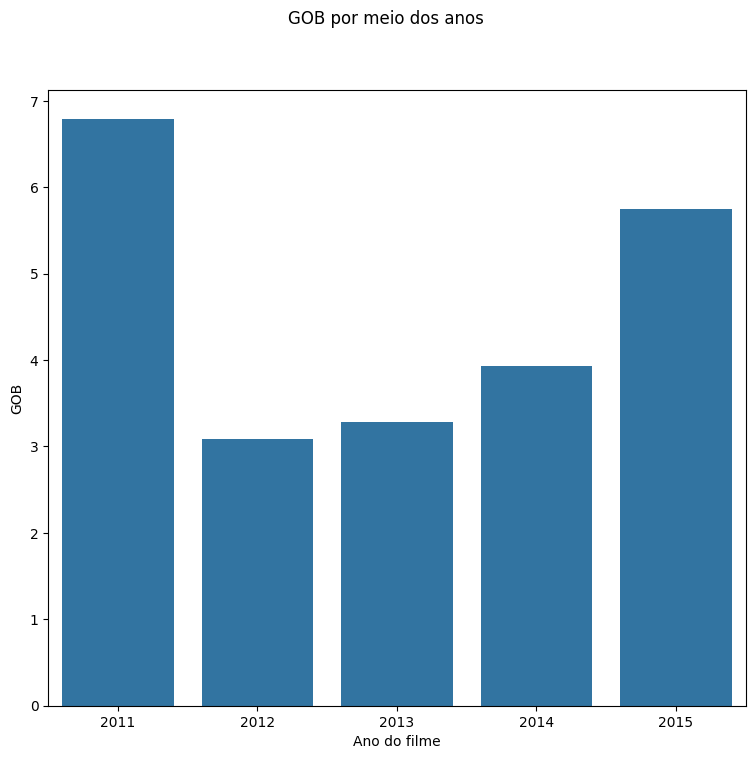

In [23]:
# Vamos fazer uma análise de tendências baseada em Clustering?

# Qual ano teve o maior GOB?

# O próximo relatório mostra os anos com altas pontuações brutas acima do orçamento para todos os filmes.
# Para fazer isso, devemos agrupar os registros com base em title_year.
# A tabela dinâmica em Python é usada para agrupar colunas e agregá-las com base em colunas numéricas, conforme mostrado no código a seguir.

# Dados de GOB com base no ano do filme

dataset_pivot=top_GOB.pivot_table(index=['title_year'], values=['GOB'], aggfunc=np.mean ,margins=True)

# A coluna do ano no conjunto de dados inclui alguns valores ausentes, iremos ignorá-los.

# Algumas células estão vazias na coluna do ano

# dataset_pivot = dataset_pivot.loc[dataset_pivot['title_year'] > 0]

# Não precisamos do último registro que inclui a métrica de resumo

dataset_pivot = dataset_pivot[:-1]

# Como o índice mudou após a criação de uma tabela dinâmica, redefinimos o índice

dataset_pivot.reset_index(inplace=True)

# Algumas células estão vazias na coluna do ano

# dataset_pivot =dataset_pivot.loc[dataset_pivot['title_year']>0]

fig,ax = plt.subplots(figsize=(9, 8))
ax=sns.barplot(x="title_year", y="GOB", data=dataset_pivot)
fig.suptitle('GOB por meio dos anos', fontsize=12)
plt.xlabel('Ano do filme')
plt.show()

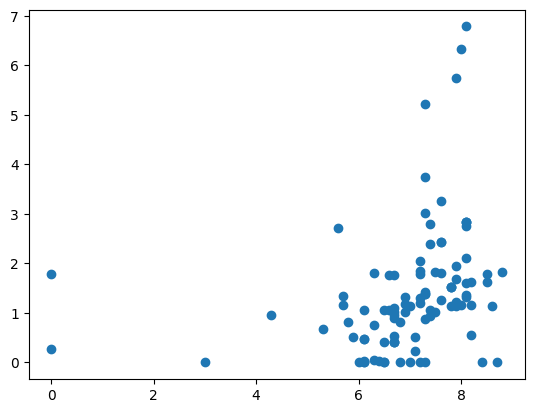

In [24]:
plt.scatter(x=dataset['imdb_score'], y=dataset['GOB'])
plt.show()
     

In [28]:
# Agora, vamos gerar clustering com três grupos.

from sklearn.cluster import KMeans

# Excluindo os valores ausentes e selecionando apenas a pontuação GOB e IMDB

selected_dataset=dataset.loc[
(dataset['GOB']>0) & dataset['imdb_score']>0][['imdb_score','GOB']]

# Agrupando o conjunto de dados usando o algoritmo K-Means

cls = KMeans(n_clusters=3)

# Ajustar o modelo ao algoritmo

cls.fit(selected_dataset)

# Trazendo os centróides e o rótulo de cada grupo

centroids=cls.cluster_centers_
labels = cls.labels_

# centroids
# red = selected_dataset[labels == 1]
# red
# green = selected_dataset[labels == 0]
# green

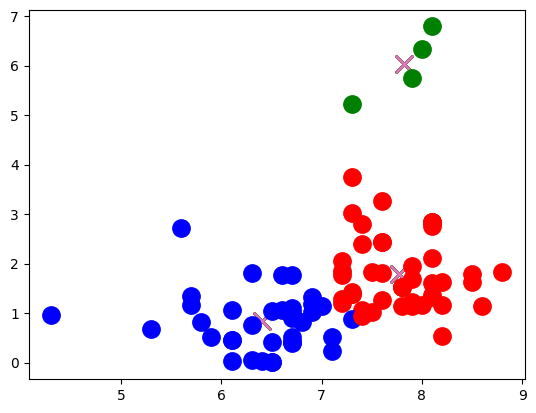

In [29]:
# Como próximo passo, vamos colorir os pontos com base em seus grupos e especificar o centro de cada grupo com um marcador (x).

# Temos três clusters, uma cor para cada cluster

colors = ["g.","r.","b.","y.","p"]

# Criando uma matriz de cada conjunto de dados para percorrer os pontos

dataset_array = np.array(selected_dataset)

# plotando o ponto em um gráfico de dispersão

for i in range(len(dataset_array)):
    plt.plot(dataset_array[i][0], dataset_array[i][1], colors [labels[i]], markersize =25);
    plt.scatter(centroids[:,0], centroids[:,1], marker='x', s=150);